# Volume 3: Pandas 1
    <erin MATHeson>
    <MATH 403>
    <Oct 12-19 2017>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

## Problem 1

Create a pandas `Series` where the index labels are the even integers $0,2,\ldots,50$ and the entries are the label squared minus one.
That is, the $n$th entry in the `Series` is $n^2 − 1$ and has label $n$.

In [2]:
#series: 1 dimensional arrays- but have labels
#numpy array but Also dictionary

my_panda = pd.Series( np.array([n**2 - 1 for n in np.array(range(0,51,2)) ]), index=np.arange(0,51,2))

#set entries = 0 if label is divisible by 3
for i in range(0,51,2):
    if i % 3 ==0:
        my_panda[i] = 0
        
print(my_panda)

0        0
2        3
4       15
6        0
8       63
10      99
12       0
14     195
16     255
18       0
20     399
22     483
24       0
26     675
28     783
30       0
32    1023
34    1155
36       0
38    1443
40    1599
42       0
44    1935
46    2115
48       0
50    2499
dtype: int64


## Problem 2

Suppose you make an investment of $d$ dollars in a particularly volatile stock.
Every day the value of your stock goes up by \$$1$ with probability $p$, or down by \$$1$ with probability $1-p$ (this is an example of a _random walk_).

Write a function that accepts a probability parameter $p$ and an initial amount of money $d$, defaulting to $100$.
Use `pd.date_range()` to create an index of the days from 1 January 2000 to 31 December 2000.
Simulate the daily change of the stock by making one draw from a Bernoulli distribution with parameter $p$ (a binomial distribution with one draw) for each day.
Store the draws in a pandas `Series` with the date index and set the first draw to the initial amount $d$.
Sum the entries cumulatively to get the stock value by day.
Set any negative values to $0$, then plot the series.

Call your function with a few different values of $p$ and $d$ to observe the different possible kinds of behavior.

In [3]:
#'crappy stock simulation' - Shane
def random_walk(p, initial_fund=100):
    days = pd.date_range("1/1/2000", "12/31/2000", freq='D')
    #length is 366 because Leap year!
    draw = np.random.binomial(1, p, len(days))*2 -1
    #bernoulli draw will only gives zeros and ones
    #want -1 (lose a dollar) where there are 0's (because matrix is 0s and 1s)
    #makes 1 become 2 -> 1 and 0 go to 0 -> -1
    s = pd.Series(draw, index=days)
    s[0] = initial_fund
    money = s.cumsum()
    #Cumulative Sum
    money[money < 0] = 0
    money.plot(label="$p = {}$".format(p))
    

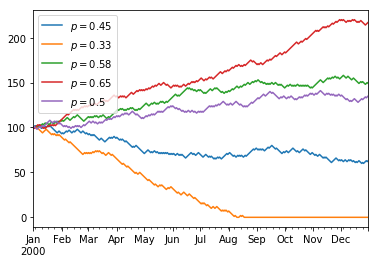

In [4]:
# Call random_walk function a few times.
random_walk(.45)
random_walk(.33)
random_walk(.58)
random_walk(.65)
random_walk(.50)

plt.legend()

## Problem 3

Use pandas to perform the following SQL query on the ''tables'' constructed below.

`SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'`

In [5]:
name = ['Mylan', 'Regan', 'Justin', 'Jess', 'Jason', 'Remi', 'Matt', 'Alexander', 'JeanMarie']
sex = ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'M', 'F']
age = [20, 21, 18, 22, 19, 20, 20, 19, 20]
rank = ['Sp', 'Se', 'Fr', 'Se', 'Sp', 'J', 'J', 'J', 'Se']
ID = range(9)
aid = ['y', 'n', 'n', 'y', 'n', 'n', 'n', 'y', 'n']
GPA = [3.8, 3.5, 3.0, 3.9, 2.8, 2.9, 3.8, 3.4, 3.7]
mathID = [0, 1, 5, 6, 3]
mathGd = [4.0, 3.0, 3.5, 3.0, 4.0]
major = ['y', 'n', 'y', 'n', 'n']
studentInfo = pd.DataFrame({'ID': ID, 'Name': name, 'Sex': sex, 'Age': age, 'Class': rank})
otherInfo = pd.DataFrame({'ID': ID, 'GPA': GPA, 'Financial_Aid': aid})
mathInfo = pd.DataFrame({'ID': mathID, 'Grade': mathGd, 'Math_Major': major})

In [6]:
studentInfo.info()
print("\n ------------------ \n")
studentInfo.head()
#default is first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Age      9 non-null int64
Class    9 non-null object
ID       9 non-null int64
Name     9 non-null object
Sex      9 non-null object
dtypes: int64(2), object(3)
memory usage: 440.0+ bytes

 ------------------ 



,Age,Class,ID,Name,Sex
0,20,Sp,0,Mylan,M
1,21,Se,1,Regan,F
2,18,Fr,2,Justin,M
3,22,Se,3,Jess,F
4,19,Sp,4,Jason,M


In [7]:
otherInfo.info()
print("\n ------------------ \n")
otherInfo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
Financial_Aid    9 non-null object
GPA              9 non-null float64
ID               9 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 296.0+ bytes

 ------------------ 



,Financial_Aid,GPA,ID
0,y,3.8,0
1,n,3.5,1
2,n,3.0,2
3,y,3.9,3
4,n,2.8,4


In [8]:
#SQL version: SELECT ID, Name from studentInfo WHERE Age > 19 AND Sex = 'M'

studentInfo[(studentInfo['Age']>19) & (studentInfo['Sex']=='M')][['ID','Name']]

,ID,Name
0,0,Mylan
6,6,Matt


## Problem 4

Using a join operation, create a DataFrame containing the ID, age, and GPA of all male individuals. You ought to be able to accomplish this in one line of code.

In [9]:
pd.merge(studentInfo, otherInfo, on='ID', how='outer')[['Age', 'GPA']]

#common data point is "ID"
# [['ID', 'Age', 'GPA']]

,Age,GPA
0,20,3.8
1,21,3.5
2,18,3.0
3,22,3.9
4,19,2.8
5,20,2.9
6,20,3.8
7,19,3.4
8,20,3.7


## Problem 5

The file `crime_data.csv` contains data on types of crimes committed in the United States from 1960 to 2016.
- Load the data into a pandas \li{DataFrame}, using the column names in the file and the column titled
`"Year"` as the index.
Make sure to skip lines that don't contain data. (p.s.there are none you have to skip)
- Insert a new column into the data frame that contains the crime rate by year (the ratio of `"Total"` column
to the `"Population"` column).
- Plot the crime rate as a function of the year.
- List the 5 years with the highest crime rate in descending order.
- Calculate the average number of total crimes as well as burglary crimes between 1960 and 2012.
- Find the years for which the total number of crimes was below average, but the number of burglaries
was above average.
- Plot the number of murders as a function of the population.
- Select the Population, Violent, and Robbery columns for all years in the 1980s, and save
this smaller data frame to a CSV file `crime_subset.csv`.


In [10]:
c_data = pd.read_csv("crime_data.csv", header=0, index_col=0)
#load into pandas DataFrame

c_data.head()

,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft
Year,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [11]:
#add crime rate column
c_data["Crime Rate"] = c_data["Total"] / c_data["Population"]

c_data.head()

,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft,Crime Rate
Year,,,,,,,,,,,,
1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200,0.018872
1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000,0.019061
1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800,0.020198
1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300,0.021803
1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800,0.023881


In [12]:
c_data.tail()

,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft,Crime Rate
Year,,,,,,,,,,,,
2012,313873685,10219059,1217067,9001992,14866,85141,355051,762009,2109932,6168874,723186,0.032558
2013,316497531,9850445,1199684,8650761,14319,82109,345095,726575,1931835,6018632,700294,0.031123
2014,318907401,9395195,1186185,8209010,14164,84864,322905,731089,1713153,5809054,686803,0.029461
2015,320896618,9258298,1234183,8024115,15883,91261,328109,764057,1587564,5723488,713063,0.028851
2016,323127513,9202093,1283058,7919035,17250,95730,332198,803007,1515096,5638455,765484,0.028478


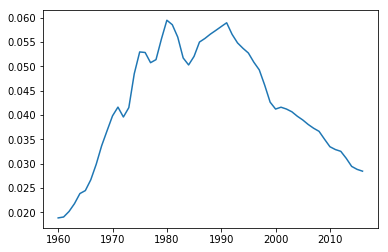

In [13]:
#Plot crime rate as a function of the year
plt.plot(c_data.index, c_data["Crime Rate"])

In [35]:
#5 years with highest crime rate (in descending order)
years = c_data.sort_values("Crime Rate", ascending=False)

print("Top 5 years with highest crime rate:")
print(list(years.index[:5]))


Top 5 years with highest crime rate:
[1980, 1991, 1981, 1990, 1989]


In [36]:
#calculate average crimes from 1960-2012
av_crimes = c_data["Total"][:-4].mean()
#checking we go to 2012
    #print(av_crimes.index[-1])

print("Average crimes per year: {:.2f}".format(av_crimes))

#calculate average burglary crimes from 1960-2012
av_burg = c_data["Burglary"][:-4].mean()
print("Average burglaries per year: {:.2f}".format(av_burg))


print("Years where total crime < average # of crimes but total burglary > average # of burglaries ")
c_data[ (c_data['Total'] < av_crimes) & (c_data["Burglary"] > av_burg) ]
#find years where num_crimes < av_crimes but num_burg > av_burg


Average crimes per year: 10638618.21
Average burglaries per year: 2446402.15
Years where total crime < average # of crimes but total burglary > average # of burglaries 


,Population,Total,Violent,Property,Murder,Forcible Rape,Robbery,Aggravated Assault,Burglary,Larceny,Vehicle Theft,Crime Rate
Year,,,,,,,,,,,,
1973,209851000,8718100,875910,7842200,19640,51400,384220,420650,2565500,4347900,928800,0.041544
1974,211392000,10253400,974720,9278700,20710,55400,442400,456210,3039200,5262500,977100,0.048504


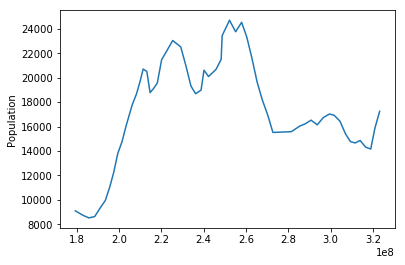

In [28]:
#plot number of murders as a function of the population
plt.plot(c_data["Population"], c_data["Murder"])
plt.ylabel("Population")
plt.show()

In [29]:
#all years in 1980's
c_data.loc[1980:1989][["Population", "Violent", "Robbery"]]

subset = c_data.loc[1980:1989][["Population", "Violent", "Robbery"]]
#save to crime_subset.csv
subset.to_csv("crime_subset.csv")

## Problem 6

In 1912 the RMS _Titanic_ sank after colliding with an iceberg.
The file `titanic.csv` contains data on the incident.
Each row represents a different passenger, and the columns describe various features of the passengers (age, sex, whether or not they survived, etc.)

Start by cleaning the data.
- Read the data into a `DataFrame`.
    Use the first row of the file as the column labels, but do not use any of the columns as the index.
- Drop the columns `"Sibsp"`, `"Parch"`, `"Cabin"`, `"Boat"`, `"Body"`, and `"home.dest"`.
- Drop any entries without data in the `"Survived"` column, then change the remaining entries to `True` or `False` (they start as 1 or 0).
- Replace null entries in the `"Age"` column with the average age.
- Save the new `DataFrame` as `titanic_clean.csv`.

Next, answer the following questions.
- How many people survived? What percentage of passengers survived?
- What was the average price of a ticket? How much did the most expensive ticket cost?
- How old was the oldest survivor? How young was the youngest survivor? What about non-survivors?


In [30]:
#each row is a passenger
ship = pd.read_csv("titanic.csv", header=0) #no index_col = 0

ship.drop(["Sibsp", "Parch", "Cabin", "Boat", "Body", "home.dest"], axis=1, inplace=True)
#doesn't return anything, but data frame gets changed

#if no data in Survived column, drop that row/person
ship = ship[ship["Survived"] != np.nan]

#change to True or False (over-write)
ship["Survived"] = ship["Survived"].astype(np.bool)

#if an age in Age column is Nan, set to average age
Av_Age = ship["Age"].mean()
#a default argument in .mean() is skipna = True->>  excludes NA/null values

ship["Age"] = ship["Age"].fillna(Av_Age)
# or use inplace=True

#save to new dataframe
ship.to_csv("titanic_clean.csv")

In [31]:
#'''Notes'''
#Ex: getting people that survived
#mask = ship["Survived"] ==1
# ship[mask]

# ship.fillna?
# ship.drop?  to see documentation

- How many people survived? What percentage of passengers survived?

In [32]:
#length of survived column
num_people = len(ship.index)

num_survivors = np.sum(ship["Survived"] == True)
#True =1, False = 0     # can also use ______.sum()
    
print("{} people survived, a.k.a, {:.2f}% of the passengers".format(num_survivors, 100*num_survivors/num_people))

500 people survived, a.k.a, 38.20% of the passengers


- What was the average price of a ticket? How much did the most expensive ticket cost?


In [33]:
av_cost = ship["Fare"].mean()

max_cost = np.max(ship["Fare"])

print("Average ticket cost was ${:.2f}".format(av_cost))
print("Most expensive ticket was ${:.2f}".format(max_cost))

Average ticket cost was $33.30
Most expensive ticket was $512.33


- How old was the oldest survivor? How young was the youngest survivor? What about non-survivors?

In [34]:
#ship[~ship["Survived"]]   finds all False
#ship[ship["Survived"]]   finds all True
ship[ship["Survived"]]["Age"]

die_mask = ~ship["Survived"]
live_mask = ship["Survived"]

ship_survivors = ship[live_mask]
#table of only people who survived
ship_deaths = ship[die_mask]
#table of only people who died

oldest_survivor = max(ship_survivors["Age"])
youngest_survivor = min(ship_survivors["Age"])

old_non_surv = max(ship_deaths["Age"])
young_non_surv = min(ship_deaths["Age"])

print("Oldest survivor was {} yrs old and youngest survivor was {} yrs old".format(oldest_survivor, youngest_survivor))
print("Oldest non-survivor was {} yrs old and youngest non-survivor was {} yrs old".format(old_non_surv, young_non_surv))


Oldest survivor was 80.0 yrs old and youngest survivor was 0.1667 yrs old
Oldest non-survivor was 74.0 yrs old and youngest non-survivor was 0.3333 yrs old
